Tangent Line Parameters:
Slopes: ['-0.5363', '-0.3595', '-0.1615', '-0.0726']
Intercepts: ['0.9384', '0.8088', '0.5249', '0.3084']

Detailed information:
------------------------------

Point 1: x = 0.50
  Coordinates: (0.50, 0.6703)
  Slope (m): -0.5363
  Y-intercept (b): 0.9384
  Equation: y = -0.5363x + 0.9384

Point 2: x = 1.00
  Coordinates: (1.00, 0.4493)
  Slope (m): -0.3595
  Y-intercept (b): 0.8088
  Equation: y = -0.3595x + 0.8088

Point 3: x = 2.00
  Coordinates: (2.00, 0.2019)
  Slope (m): -0.1615
  Y-intercept (b): 0.5249
  Equation: y = -0.1615x + 0.5249

Point 4: x = 3.00
  Coordinates: (3.00, 0.0907)
  Slope (m): -0.0726
  Y-intercept (b): 0.3084
  Equation: y = -0.0726x + 0.3084


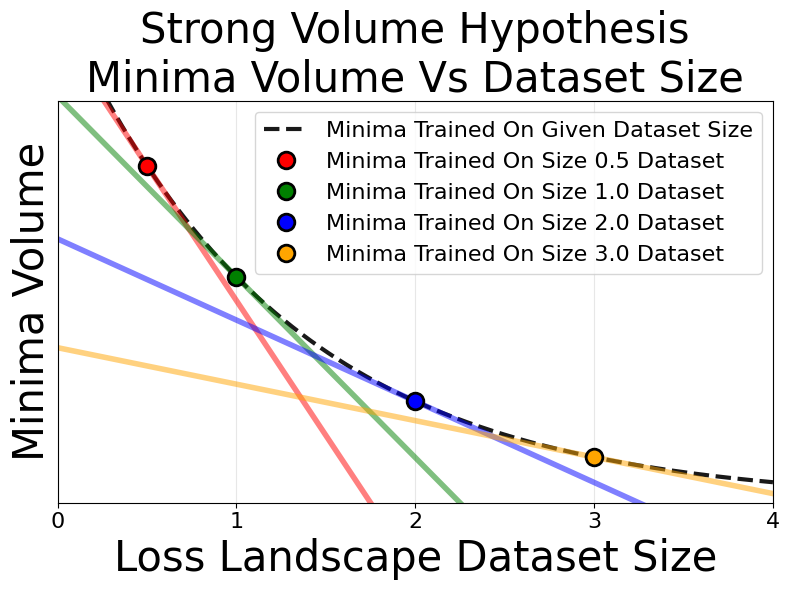

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_function(x):
    """The exponential function e^{-x}"""
    return np.exp(-x*0.8)

def calculate_tangent_parameters(x_points, func):
    """
    Calculate tangent line parameters for given points on a function
    
    Parameters:
    x_points: list of x-coordinates where tangents should be calculated
    func: the function to find tangents for
    
    Returns:
    slopes: list of slopes for each tangent line
    intercepts: list of y-intercepts for each tangent line
    tangent_info: list of dictionaries with detailed tangent line parameters
    """
    slopes = []
    intercepts = []
    tangent_info = []
    
    for x in x_points:
        # Calculate y value at the point
        y = func(x)
        
        # Calculate derivative using finite difference
        h = 1e-6  # small step size
        slope = (func(x + h) - func(x - h)) / (2 * h)
        
        # Calculate y-intercept (b = y - m*x)
        intercept = y - slope * x
        
        slopes.append(slope)
        intercepts.append(intercept)
        tangent_info.append({
            'x_point': x,
            'y_point': y,
            'slope': slope,
            'intercept': intercept,
            'equation': f"y = {slope:.4f}x + {intercept:.4f}"
        })
    
    return slopes, intercepts, tangent_info

def plot_function_with_tangents(func, slopes, intercepts, x_points, x_range=(0, 5), tangent_x_range=None):
    """
    Plot the function and its tangent lines across the full x-range
    
    Parameters:
    func: the function to plot
    slopes: list of slopes for tangent lines
    intercepts: list of y-intercepts for tangent lines
    x_points: list of x-coordinates where tangents are calculated
    x_range: tuple of (x_min, x_max) for the main function plot
    tangent_x_range: tuple of (x_min, x_max) for tangent lines (defaults to x_range)
    """
    if tangent_x_range is None:
        tangent_x_range = x_range
    
    # Generate x values for the main function
    x = np.linspace(x_range[0], x_range[1], 400)
    y = func(x)
    
    # Generate x values for tangent lines (full range)
    tangent_x = np.linspace(tangent_x_range[0], tangent_x_range[1], 400)
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # Plot the main function in black
    plt.plot(x, y, 'k--', linewidth=3, label=r'Minima Trained On Given Dataset Size', alpha=0.9)
    
    # Colors for different tangent lines
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
    
    # Plot each tangent line across the full specified range
    for i, (slope, intercept, x_point) in enumerate(zip(slopes, intercepts, x_points)):
        # Calculate tangent line values
        tangent_y = slope * tangent_x + intercept
        
        # Calculate the point of tangency
        y_point = func(x_point)
        
        # Plot the full tangent line (no label in legend)
        plt.plot(tangent_x, tangent_y, '-', color=colors[i % len(colors)], 
                linewidth=4, alpha=0.5)
        
        # Plot the point of tangency with label and black border
        plt.plot(x_point, y_point, 'o', color=colors[i % len(colors)], 
                markersize=12, markeredgecolor='black', markeredgewidth=2,
                label=f'Minima Trained On Size {x_point:.1f} Dataset')
    
    # Customize the plot with larger fonts
    plt.xlabel('Loss Landscape Dataset Size', fontsize=30)
    plt.ylabel('Minima Volume', fontsize=30)
    plt.title('Strong Volume Hypothesis\nMinima Volume Vs Dataset Size', fontsize=30)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=16)
    
    # Increase tick label size
    plt.xticks([0, 1, 2, 3, 4], fontsize=16)  # set x-ticks explicitly
    plt.yticks(fontsize=16)
    plt.yticks([])
    
    # Set appropriate y-axis limits
    y_min = min(0, min([slope * tangent_x_range[0] + intercept for slope, intercept in zip(slopes, intercepts)]))
    y_max = max(1.1, max([slope * tangent_x_range[1] + intercept for slope, intercept in zip(slopes, intercepts)]))
    plt.axis([tangent_x_range[0], tangent_x_range[1], y_min, y_max])
    
    # Make the plot borders thicker
    plt.ylim((0, 0.8))
    
    plt.tight_layout()
    plt.savefig("figs/strong_volume_hypothesis_cartoon.png", dpi=300, bbox_inches='tight')  # save the figure
    plt.show()

# Define the points where you want tangents
x_points = [0.5, 1, 2, 3]

# Calculate tangent parameters
slopes, intercepts, tangent_info = calculate_tangent_parameters(x_points, exponential_function)

# Print the results
print("Tangent Line Parameters:")
print("=" * 50)
print(f"Slopes: {[f'{s:.4f}' for s in slopes]}")
print(f"Intercepts: {[f'{b:.4f}' for b in intercepts]}")
print("\nDetailed information:")
print("-" * 30)

for i, info in enumerate(tangent_info):
    print(f"\nPoint {i+1}: x = {info['x_point']:.2f}")
    print(f"  Coordinates: ({info['x_point']:.2f}, {info['y_point']:.4f})")
    print(f"  Slope (m): {info['slope']:.4f}")
    print(f"  Y-intercept (b): {info['intercept']:.4f}")
    print(f"  Equation: {info['equation']}")

# Plot the results with full tangent lines
plot_function_with_tangents(
    exponential_function, 
    slopes, 
    intercepts, 
    x_points,
    x_range=(0, 4),           # Range for main function
    tangent_x_range=(0, 4)     # Range for tangent lines (can be different)
)

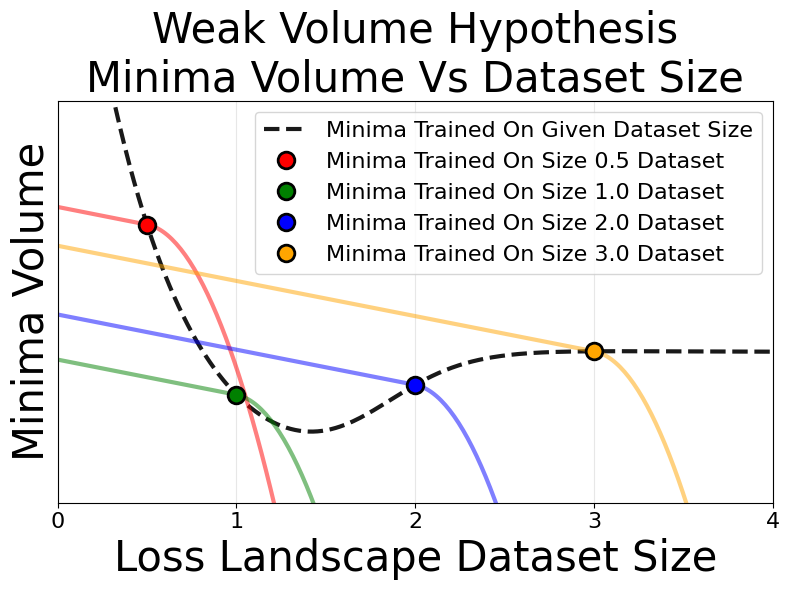

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def piecewise_linear_quadratic(x, x0, y0=0.0, slope=-0.5, quad_coef=-5.0):
    """
    Piecewise function with a more severe downward quadratic drop:
    - Linear with negative slope for x < x0
    - Steeper downward quadratic for x >= x0, smoothly connected to linear part
    
    Parameters:
    x : ndarray
        X values to compute
    x0 : float
        Knee location
    y0 : float
        Y value at x0 (starting value of curve)
    slope : float
        Linear slope before x0
    quad_coef : float
        Quadratic coefficient after x0 (more negative => steeper drop)
    """
    y = np.zeros_like(x, dtype=float)
    
    # Linear part: ensure it passes through (x0, y0)
    mask_linear = x < x0
    y[mask_linear] = y0 + slope * (x[mask_linear] - x0)
    
    # Quadratic part: more severe drop
    mask_quad = x >= x0
    y[mask_quad] = y0 + slope * (x[mask_quad] - x0) + 0.5 * quad_coef * (x[mask_quad] - x0)**2
    
    return y

def plot_function_with_piecewise_quadratics(func, x_points, x_range=(0, 5), slope=-0.5, quad_coef=-2,
                                            title="Weak Volume Hypothesis\nMinima Volume Vs Dataset Size",
                                           filename="figs/weak_volume_hypothesis_data.png"):
    """
    Plot the base function and overlay piecewise linear→quadratic curves at specified points.
    
    Parameters:
    func : callable
        Base function
    x_points : list of floats
        Points at which piecewise curves originate
    x_range : tuple
        Range of x values to plot
    slope : float
        Linear slope before x0
    quad_coef : float
        Quadratic coefficient after x0
    title : str
        Title of the plot
    """
    x = np.linspace(x_range[0], x_range[1], 400)
    y_base = func(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_base, 'k--', linewidth=3, label=r'Minima Trained On Given Dataset Size', alpha=0.9)
    
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    
    for i, x0 in enumerate(x_points):
        y0 = func(x0)  # starting y-value from the base function
        y_curve = piecewise_linear_quadratic(x, x0, y0=y0, slope=slope, quad_coef=quad_coef)
        plt.plot(x, y_curve, '-', color=colors[i % len(colors)], linewidth=3, alpha=0.5)
        plt.plot(x0, y0, 'o', color=colors[i % len(colors)], markersize=12, 
                 markeredgecolor='black', markeredgewidth=2, 
                 label=f'Minima Trained On Size {x0:.1f} Dataset')
    
    # Customize the plot with larger fonts
    plt.xlabel('Loss Landscape Dataset Size', fontsize=30)
    plt.ylabel('Minima Volume', fontsize=30)
    plt.title(title, fontsize=30)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=16, loc="upper right")
    plt.xticks([0, 1, 2, 3, 4], fontsize=16)  # set x-ticks explicitly
    plt.yticks([])
    plt.ylim((0, 0.8))
    plt.xlim((0, 4.0))
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # save the figure
    plt.show()

def decreasing_plus_increasing(x, A=1.5, k=2):
    """
    Custom function: decreasing exponential + increasing sqrt(x).
    
    Parameters:
    x: float or ndarray
    A: float
        Amplitude of the exponential term
    k: float
        Decay rate of the exponential term
    B: float
        Coefficient for sqrt(x)
    """
    return A * np.exp(-k * x) + increasing_plateau(x)

def increasing_plateau(x, L=0.3, x0=1.8, k=4.0):
    """
    Smooth increasing function:
    - Rises around x0
    - Approaches L by x ~ x0 + 2/k
    """
    return L / (1 + np.exp(-k * (x - x0)))

# Example usage
x_points = [0.5, 1, 2, 3]

plot_function_with_piecewise_quadratics(
    decreasing_plus_increasing, 
    x_points, 
    x_range=(0, 5), 
    slope=-0.07, 
    quad_coef=-2.0,
    title="Weak Volume Hypothesis\nMinima Volume Vs Dataset Size",
    filename="figs/weak_volume_hypothesis_data.png"
)


In [ ]:
plot_function_with_piecewise_quadratics(
    exponential_function, 
    x_points, 
    x_range=(0, 5), 
    slope=-0.07, 
    quad_coef=-2.0,
    title="Strong Volume Hypothesis\nMinima Volume Vs Dataset Size",
    filename="figs/strong_volume_hypothesis_data.png"
)